In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df=pd.read_csv("CL1_2_uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
#Data Preprocessing
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.shape

(200000, 9)

In [7]:
df=df.dropna()

In [8]:
df.shape

(199999, 9)

In [9]:
df = df[(df['pickup_longitude'] != 0) & (df['dropoff_longitude'] != 0)]
df = df[(df['pickup_latitude'] != 0) & (df['dropoff_latitude'] != 0)]
print("After removing invalid coordinates:", df.shape)

After removing invalid coordinates: (196031, 9)


In [10]:
df = df[df['fare_amount'] > 0]
print("After removing invalid fares:", df.shape)



After removing invalid fares: (196012, 9)


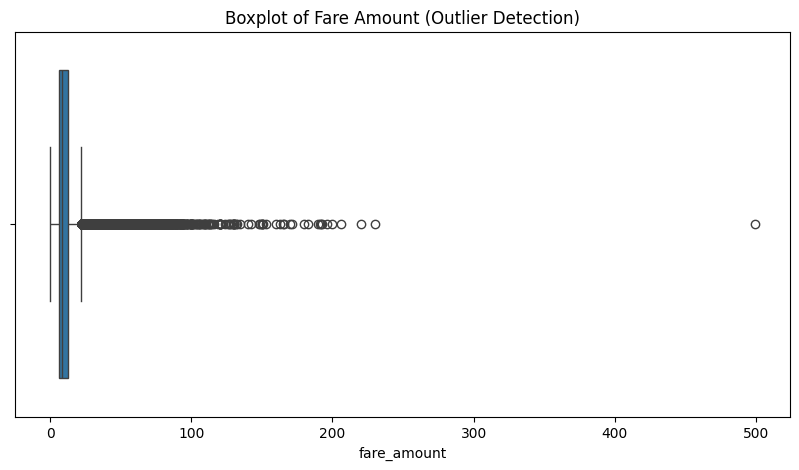

In [11]:
# Step 5: Identify Outliers using Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot of Fare Amount (Outlier Detection)")
plt.show()

In [12]:
df = df[df['fare_amount'] < 100]
print("After removing extreme outliers:", df.shape)


After removing extreme outliers: (195929, 9)


In [13]:
# Step 6: Correlation
corr = df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
           'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].corr()

Correlation Matrix:
                    fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.005429        -0.003071   
pickup_longitude      0.005429          1.000000        -0.561844   
pickup_latitude      -0.003071         -0.561844         1.000000   
dropoff_longitude     0.002499          0.632260        -0.564498   
dropoff_latitude     -0.005752         -0.600468         0.363954   
passenger_count       0.012783          0.005354        -0.005924   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                 0.002499         -0.005752         0.012783  
pickup_longitude            0.632260         -0.600468         0.005354  
pickup_latitude            -0.564498          0.363954        -0.005924  
dropoff_longitude           1.000000         -0.787728         0.003519  
dropoff_latitude           -0.787728          1.000000        -0.005269  
passenger_count             0.003519         -0.005

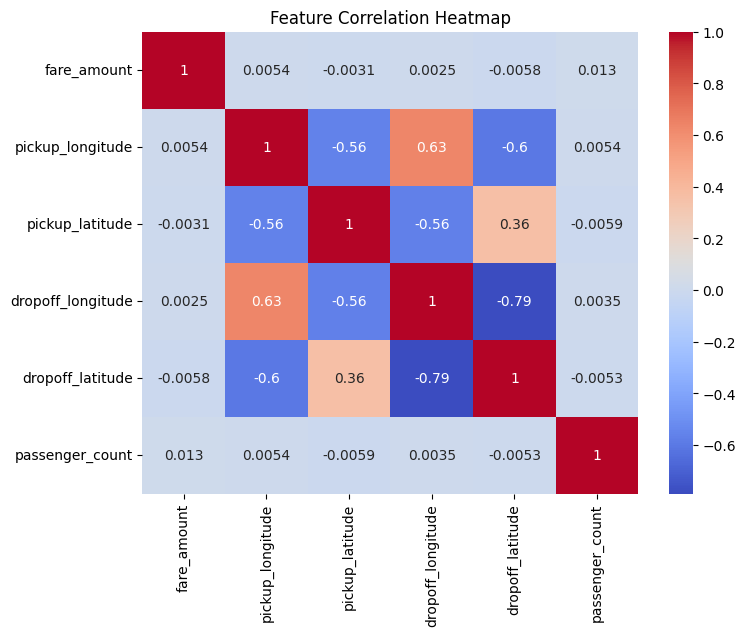

In [14]:
print("Correlation Matrix:\n", corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
x = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
        'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Step 8: Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [18]:
# Step 9: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [19]:
# Step 10: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
# Step 11: Evaluate Models
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} → R²: {r2:.3f}, RMSE: {rmse:.3f}")

In [21]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression → R²: 0.000, RMSE: 9.318
Ridge Regression → R²: 0.000, RMSE: 9.318
Lasso Regression → R²: 0.000, RMSE: 9.319


In [22]:
# Step 12: Compare Results visually
models = ['Linear', 'Ridge', 'Lasso']
r2_scores = [r2_score(y_test, y_pred_lr),
             r2_score(y_test, y_pred_ridge),
             r2_score(y_test, y_pred_lasso)]


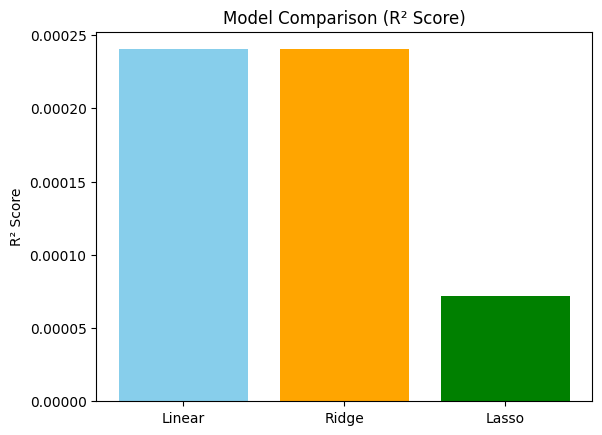

In [23]:
plt.bar(models, r2_scores, color=['skyblue', 'orange', 'green'])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()